In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
import keras
import tensorflow as tf
import os
import numpy as np

2025-07-22 16:34:05.869378: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753202046.078749      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753202046.140731      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
VOCAB_SIZE = 88584

MAXLEN = 250
BATCH_SIZE = 64

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = VOCAB_SIZE)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(len(train_data[0]))
print(len(test_data[0]))

218
68


The data are different lengths. This is an issue. We cannot pass different length data into our neural network. Therefore, we must make each review the same length. To do this we will follow the procedure below:

In [4]:
train_data = sequence.pad_sequences(train_data, MAXLEN)
test_data = sequence.pad_sequences(test_data, MAXLEN)

In [5]:
print(len(train_data[0]))
from tensorflow.keras import regularizers
print(len(test_data[0]))

250
250


In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(MAXLEN,)))
model.add(tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=32))
model.add(tf.keras.layers.LSTM(32, dropout=0.2))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

I0000 00:00:1753202064.735615      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1753202064.736202      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 250, 32)        │     2,834,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,843,041 (10.85 MB)

 Trainable params: 2,843,041 (10.85 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

In [9]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(train_data, train_labels, epochs=10, validation_split=0.2, callbacks=[early_stop])

Epoch 1/10


I0000 00:00:1753202069.516694      63 cuda_dnn.cc:529] Loaded cuDNN version 90300


625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - acc: 0.7118 - loss: 0.5329 - val_acc: 0.8652 - val_loss: 0.3291
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - acc: 0.9239 - loss: 0.2037 - val_acc: 0.8730 - val_loss: 0.3064
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - acc: 0.9676 - loss: 0.1018 - val_acc: 0.7880 - val_loss: 0.4301
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - acc: 0.9682 - loss: 0.0938 - val_acc: 0.8572 - val_loss: 0.3919
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - acc: 0.9846 - loss: 0.0472 - val_acc: 0.8468 - val_loss: 0.4108


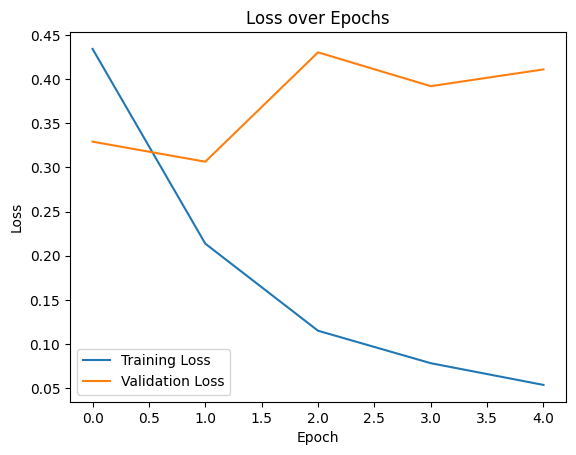

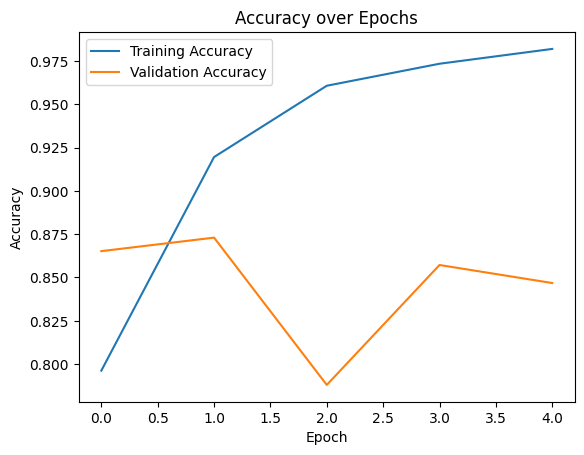

In [10]:
import matplotlib.pyplot as plt

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracy
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [11]:
results = model.evaluate(test_data, test_labels)
print(results)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.8669 - loss: 0.3201
[0.3210742473602295, 0.867680013179779]


In [12]:
model.save('/kaggle/working/my_model.h5')